# Pymaceuticals Inc.
---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

master_df  = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview

master_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
master_df['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = master_df[master_df.duplicated(subset=None, keep='first')]
duplicate_mouse_ids["Mouse ID"].values

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
master_df[master_df["Mouse ID"].isin(duplicate_mouse_ids["Mouse ID"].values)]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [25]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_ID_df = master_df.set_index('Mouse ID')
mouse_dup_df = mice_ID_df.loc['g989', :]
mouse_dup_df.head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26


In [26]:
clean_Master_df = mice_ID_df.drop(index = 'g989')
clean_Mice_ID_df = clean_Master_df.reset_index()

clean_Mice_ID_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [27]:
# Checking the number of mice in the clean DataFrame.
len(clean_Mice_ID_df[clean_Mice_ID_df["Mouse ID"] != "g989"])

1880

## Summary Statistics

In [28]:
drug_regi_df = clean_Mice_ID_df["Drug Regimen"].unique()

In [29]:
clean_Mice_ID_df[clean_Mice_ID_df["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)'].sem()

0.32934562340083096

In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean_value = []
median = []
var = []
std = []
std_err = []


for drug_reg in drug_regi_df:
    mean_value.append(clean_Mice_ID_df[clean_Mice_ID_df["Drug Regimen"] == drug_reg]['Tumor Volume (mm3)'].mean())
    median.append(clean_Mice_ID_df[clean_Mice_ID_df["Drug Regimen"] == drug_reg]['Tumor Volume (mm3)'].median())
    var.append(clean_Mice_ID_df[clean_Mice_ID_df["Drug Regimen"] == drug_reg]['Tumor Volume (mm3)'].var())
    std.append(clean_Mice_ID_df[clean_Mice_ID_df["Drug Regimen"] == drug_reg]['Tumor Volume (mm3)'].std())
    std_err.append(clean_Mice_ID_df[clean_Mice_ID_df["Drug Regimen"] == drug_reg]['Tumor Volume (mm3)'].sem())
    
    
pd.DataFrame({
    "Mean Tumor Volumn": mean_value,
    "Median Tumor Volume": median,
    "Tumor Volume Variance": var,
    "Tumor Volume Std. Dev.": std,
    "Tumor Volumn Std. Err.": std_err,
})


,Mean Tumor Volumn,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volumn Std. Err.
0,40.675741,41.557809,24.947764,4.994774,0.329346
1,55.235638,53.698743,68.553577,8.279709,0.603860
2,54.331565,52.509285,66.173479,8.134708,0.596466
3,52.884795,51.820584,43.128684,6.567243,0.492236
4,54.233149,52.431737,59.450562,7.710419,0.573111
5,40.216745,40.673236,23.486704,4.846308,0.320955
6,53.236507,51.818479,48.533355,6.966589,0.516398
7,52.320930,50.446266,43.852013,6.622085,0.544332
8,54.033581,52.288934,61.168083,7.821003,0.581331
9,52.591172,51.776157,39.290177,6.268188,0.469821


In [31]:
clean_Mice_ID_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_Mice_ID_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].aggregate(["mean", "median", "var", "std", "sem"])


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
Drug_TimePoint_df = pd.DataFrame(clean_Mice_ID_df.groupby(['Drug Regimen','Timepoint'])['Mouse ID'].count())
Drug_TimePoint_df = Drug_TimePoint_df.reset_index()
Drug_TimePoint_df = Drug_TimePoint_df.rename(columns={'Mouse ID': 'Mouse Count'})

Drug_TimePoint_df.value_counts().value_counts()

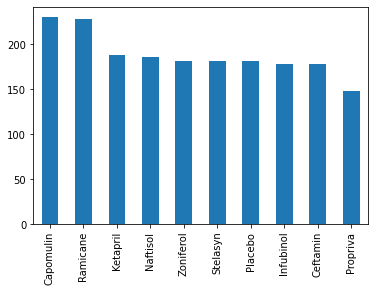

In [33]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
clean_Mice_ID_df['Drug Regimen'].value_counts()

clean_Mice_ID_df['Drug Regimen'].value_counts().plot(kind="bar");

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

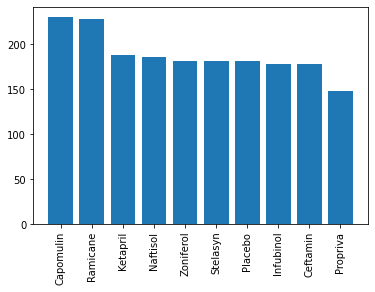

In [34]:
data = clean_Mice_ID_df['Drug Regimen'].value_counts()


plt.figure()
plt.bar(data.index, data.values)
plt.xticks(rotation=90)

<AxesSubplot:ylabel='Mouse ID'>

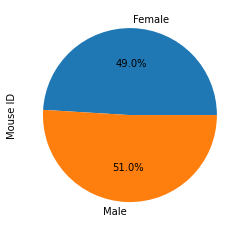

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_Mice_ID_df.groupby(['Sex']).count()['Mouse ID'].plot(kind="pie", autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x7fec26819670>,
 [Text(0.036089469908307935, 1.1994571897995099, 'Female'),
  Text(-0.0330820140826155, -1.0995024239828841, 'Male')],
 [Text(0.021052190779846297, 0.6996833607163808, '49.0%'),
  Text(-0.018044734954153905, -0.5997285948997549, '51.0%')])

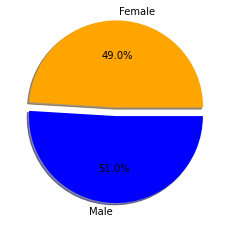

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Sex_labels = clean_Mice_ID_df.groupby(['Sex']).count()['Mouse ID']
labels = ['Female', 'Male']
colors = ["orange", "blue"]
explode = (0.1, 0)

plt.pie( Sex_labels, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True)

## Quartiles, Outliers and Boxplots

In [38]:
subset_df = clean_Mice_ID_df[clean_Mice_ID_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
subset_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
29,c326,0,45.0,0,Infubinol,Female,18,25
30,c139,0,45.0,0,Infubinol,Male,11,28
31,v339,0,45.0,0,Infubinol,Male,20,26
32,a577,0,45.0,0,Infubinol,Female,6,25


In [39]:
subset_df.groupby(["Mouse ID"])["Timepoint", "Tumor Volume (mm3)"].max()

/var/folders/mc/nvjx38yn6j14pqksc9yx1pk40000gn/T/ipykernel_69922/4056748986.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  subset_df.groupby(["Mouse ID"])["Timepoint", "Tumor Volume (mm3)"].max()


,Timepoint,Tumor Volume (mm3)
Mouse ID,,
a203,45,67.973419
a251,45,65.525743
a275,45,62.999356
a411,45,45.466677
a444,45,45.000000
...,...,...
y769,45,68.594745
y793,45,45.000000
y865,45,64.729837


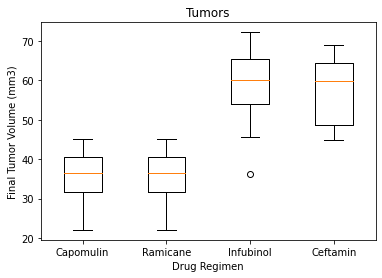

/var/folders/mc/nvjx38yn6j14pqksc9yx1pk40000gn/T/ipykernel_69922/2965984176.py:51: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = subset_df.groupby(["Drug Regimen"])["Timepoint", "Tumor Volume (mm3)"]


Timepoint  Tumor Volume (mm3)
Drug Regimen                                    
Capomulin    0.25       10.0           37.685933
             0.50       20.0           41.557809
             0.75       35.0           45.000000
Ceftamin     0.25        5.0           47.208427
             0.50       20.0           51.776157
             0.75       30.0           56.801438
Infubinol    0.25        5.0           47.312353
             0.50       15.0           51.820584
             0.75       30.0           57.314444
Ramicane     0.25       10.0           36.674635
             0.50       20.0           40.673236
             0.75       35.0           45.000000

In [40]:
# Creating a df that is finding the max timepoint and also the max tumor vol 
subset_mouseTP_df = subset_df.groupby(["Mouse ID"]).max()["Timepoint"]
subset_mouseTP_df_update = pd.DataFrame(subset_mouseTP_df)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

subset_df_merge = pd.merge(subset_mouseTP_df_update, subset_df, on=("Mouse ID","Timepoint"),how="left")

# Preview dataframe

subset_df_merge


# Isolate tumor data into a dataframe
tum_vol_data = subset_df_merge["Tumor Volume (mm3)"]
tum_vol_data

# Individualizing data frames for the 4 indexed drug regimens 
capomulin_df = subset_df_merge.loc[subset_df_merge["Drug Regimen"] == "Capomulin",:]['Tumor Volume (mm3)']
capomulin_df = subset_df_merge.loc[subset_df_merge["Drug Regimen"] == "Ramicane", :]['Tumor Volume (mm3)']
infubinol_df = subset_df_merge.loc[subset_df_merge["Drug Regimen"] == "Infubinol", :]['Tumor Volume (mm3)']
ceftamin_df = subset_df_merge.loc[subset_df_merge["Drug Regimen"] == "Ceftamin", :]['Tumor Volume (mm3)']



# Calculations on IQR datapoints and quantitatively determine if there are any potential outliers. 

quartiles = tum_vol_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

drug_reg_data = [capomulin_df, capomulin_df, infubinol_df, ceftamin_df]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')


ax1.boxplot(drug_reg_data, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.savefig('boxplot')
plt.show()

df = subset_df.groupby(["Drug Regimen"])["Timepoint", "Tumor Volume (mm3)"]
df.quantile([.25, .5, .75])



## Line and Scatter Plots

In [41]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
b128_df = subset_df.loc[subset_df["Mouse ID"] == "b128",:]
b128_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
468,b128,5,45.651331,0,Capomulin,Female,9,22
674,b128,10,43.270852,0,Capomulin,Female,9,22
713,b128,15,43.784893,0,Capomulin,Female,9,22
925,b128,20,42.731552,0,Capomulin,Female,9,22


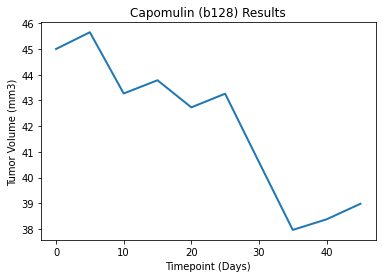

In [42]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

time_line = b128_df["Timepoint"]
tumor_vol = b128_df["Tumor Volume (mm3)"]

plt.title('Capomulin (b128) Results')
plt.plot(time_line, tumor_vol,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('Sample Result Timeline')
plt.show()

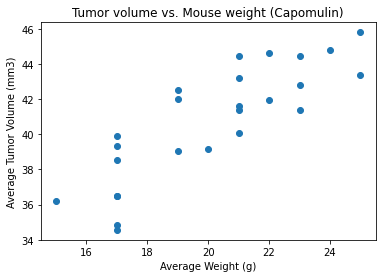

In [43]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_df = subset_df.loc[subset_df["Drug Regimen"] == "Capomulin",:]
capomulin_df_avg = capomulin_df.groupby(['Mouse ID']).mean()

plt.scatter(capomulin_df_avg['Weight (g)'],capomulin_df_avg['Tumor Volume (mm3)'])
plt.title('Tumor volume vs. Mouse weight (Capomulin)')
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()

## Correlation and Regression

In [44]:
#Using python "round" function and scipy.stats.pearsonr to find correlation coefficient and p-value

correlation = round(st.pearsonr(capomulin_df_avg['Weight (g)'],capomulin_df_avg['Tumor Volume (mm3)'])[0],2)

#finding linear reg for y_values 
linear_reg =st.linregress(capomulin_df_avg['Weight (g)'],capomulin_df_avg['Tumor Volume (mm3)'])
linear_reg

#Define y_values 
slope = 0.9544396890241045
intercept = 21.552160532685015

The correlation between mouse weight and average tumor volume is 0.84


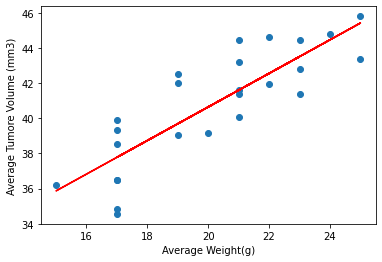

In [45]:
y_values = capomulin_df_avg['Weight (g)']*slope + intercept
plt.scatter(capomulin_df_avg['Weight (g)'],capomulin_df_avg['Tumor Volume (mm3)'])
plt.plot(capomulin_df_avg['Weight (g)'],y_values,color="red")
plt.xlabel('Average Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
print(f"The correlation between mouse weight and average tumor volume is {correlation}")


plt.savefig('linearregression')
plt.show()